# Predicting House Prices using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting House Prices.

The following approaches will be taken:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

> How well can I predict the sale price of each house, for each Id in the test set I must predict the value of the SalePrice variable,  given various features and prices of some houses?


## 2. Data

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

This dataset is available in Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

There are two main datasets:

* Train.csv is the training set
* Test.csv is the test set

## 3. Evaluation

> The evaluation metrics for this project are: RMSE (Root Mean Square Error), MAE (Mean Absolute Error), R^2 Score

## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on: "House-Price-Prediction/house-prices-advanced-regression-techniques/data_description.txt"




## Preparing the tools

These libraries: Pandas, Matplotlib, Seaborn and Numpy will be used for data analysis and manipulation.

In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
%matplotlib inline
import pandas as pd
import numpy as np 
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

## Load Data

In [2]:
# Loading Train data
train = pd.read_csv("Data/train.csv")


## Exploratory Data Analysis (EDA)

In [3]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.head(5).T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
...,...,...,...,...,...
MoSold,2,5,9,2,12
YrSold,2008,2007,2008,2006,2008
SaleType,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
train.isna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [8]:
train.duplicated().sum()

0

In [9]:
train.duplicated().any()

False

## Filling in missing values

In [10]:
train["LotFrontage"] = train["LotFrontage"].fillna(train["LotFrontage"].mean())

In [11]:
train.isna().sum().sum()

7570

A lot of these flagged missing values are not missing. The description in some of these columns are NA but they are flagged as NaN and others are represented as `0` since they do not contain those features entirely.

In [12]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


>How many houses are in good condition?

In [13]:
print(train.groupby("OverallCond").size())

OverallCond
1      1
2      5
3     25
4     57
5    821
6    252
7    205
8     72
9     22
dtype: int64


OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

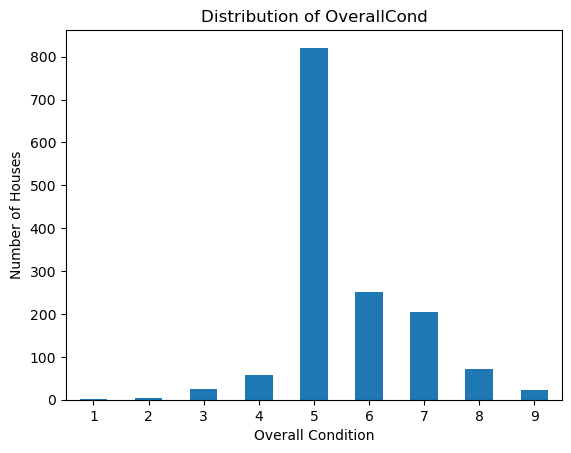

In [14]:
# Visualizing Overall Conditions of the houses
train.groupby("OverallCond").size().plot(kind = "bar")
plt.xlabel("Overall Condition")
plt.ylabel("Number of Houses")
plt.title("Distribution of OverallCond")
plt.xticks(rotation="horizontal")
plt.show()

In [15]:
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

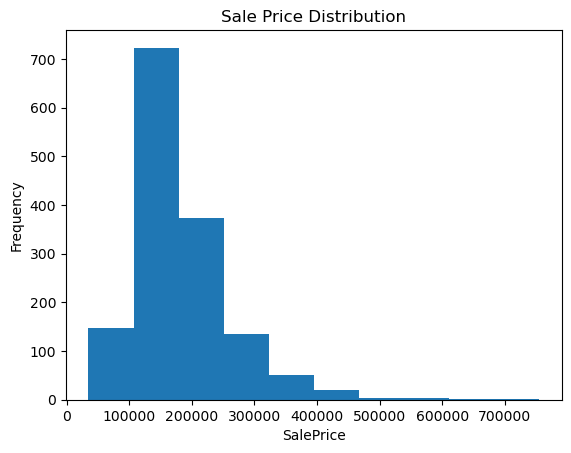

In [16]:
train.SalePrice.plot.hist(title = "Sale Price Distribution", xlabel="SalePrice")
plt.show()

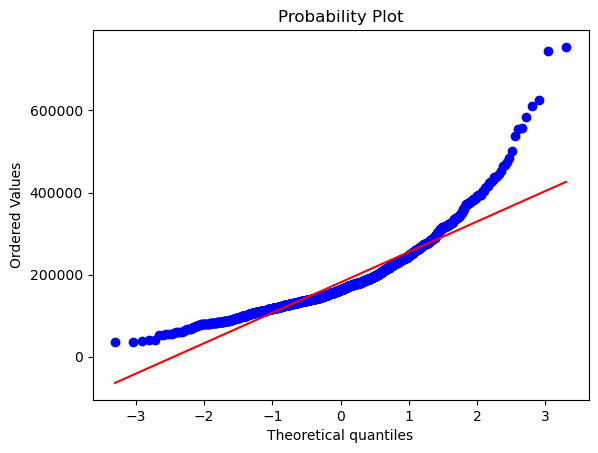

In [17]:
stats.probplot(train["SalePrice"], plot = plt)
plt.show()

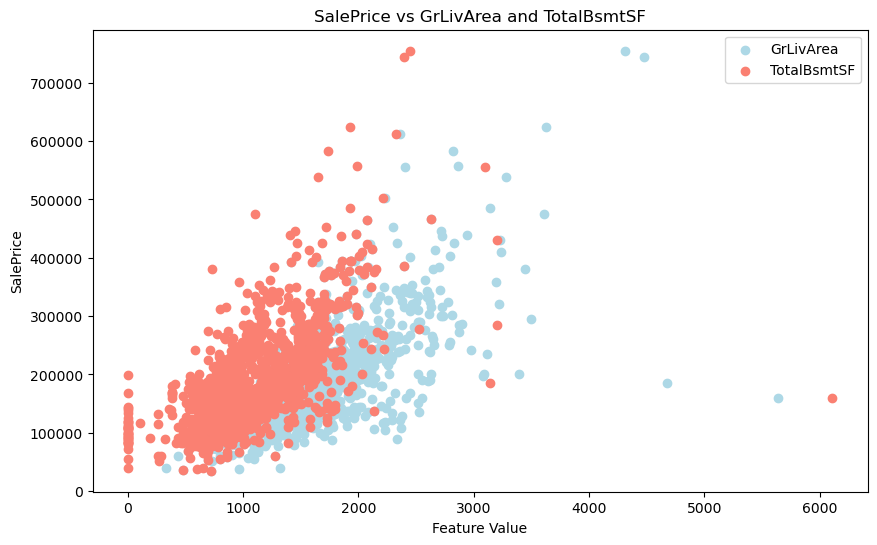

In [18]:
plt.figure(figsize=(10, 6))

# Scatter plot: GrLivArea vs SalePrice
plt.scatter(train.GrLivArea, train.SalePrice, c="lightblue", label="GrLivArea")

# Scatter plot: TotalBsmtSF vs SalePrice
plt.scatter(train.TotalBsmtSF, train.SalePrice, c="salmon", label="TotalBsmtSF")

plt.title("SalePrice vs GrLivArea and TotalBsmtSF")
plt.xlabel("Feature Value")
plt.ylabel("SalePrice")
plt.legend()
plt.show()


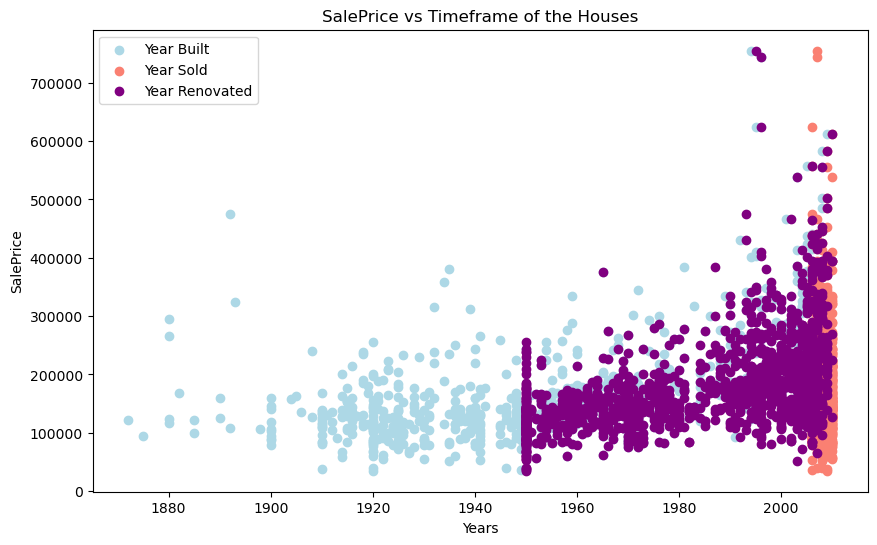

In [19]:
plt.figure(figsize=(10, 6))

plt.scatter(train.YearBuilt, train.SalePrice, c="lightblue", label="Year Built")

plt.scatter(train.YrSold, train.SalePrice, c="salmon", label="Year Sold")

plt.scatter(train.YearRemodAdd, train.SalePrice, c="purple", label="Year Renovated")

plt.title("SalePrice vs Timeframe of the Houses")
plt.xlabel("Years")
plt.ylabel("SalePrice")
plt.legend()
plt.show()


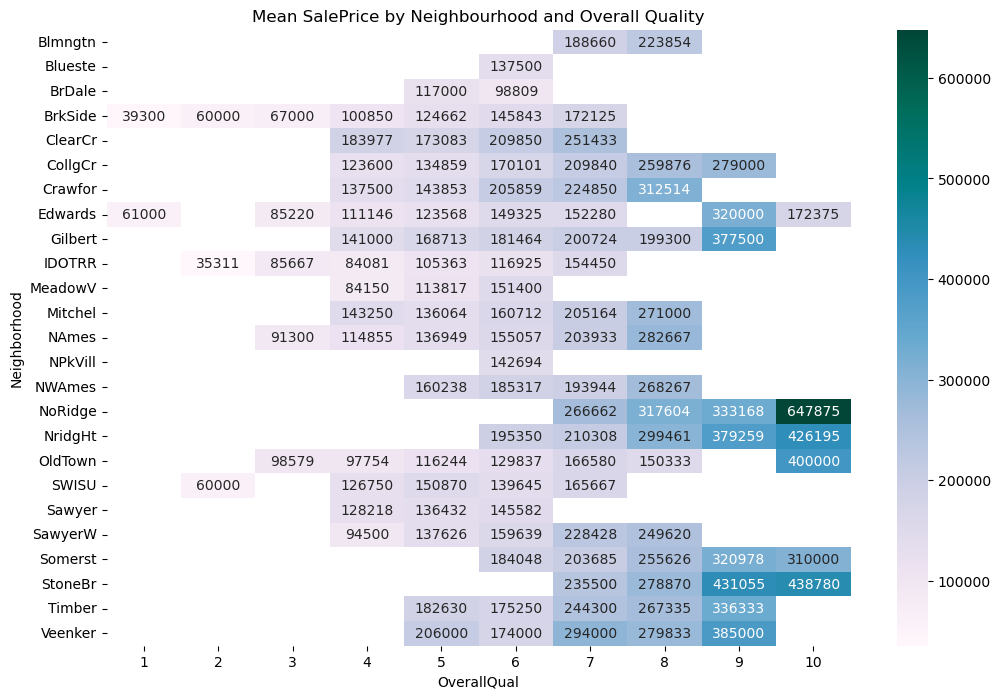

In [20]:
Overall_quality = train.groupby(['Neighborhood', 'OverallQual'])['SalePrice'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(Overall_quality, annot=True, fmt=".0f", cmap="PuBuGn")
plt.title("Mean SalePrice by Neighbourhood and Overall Quality")

plt.show()

	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

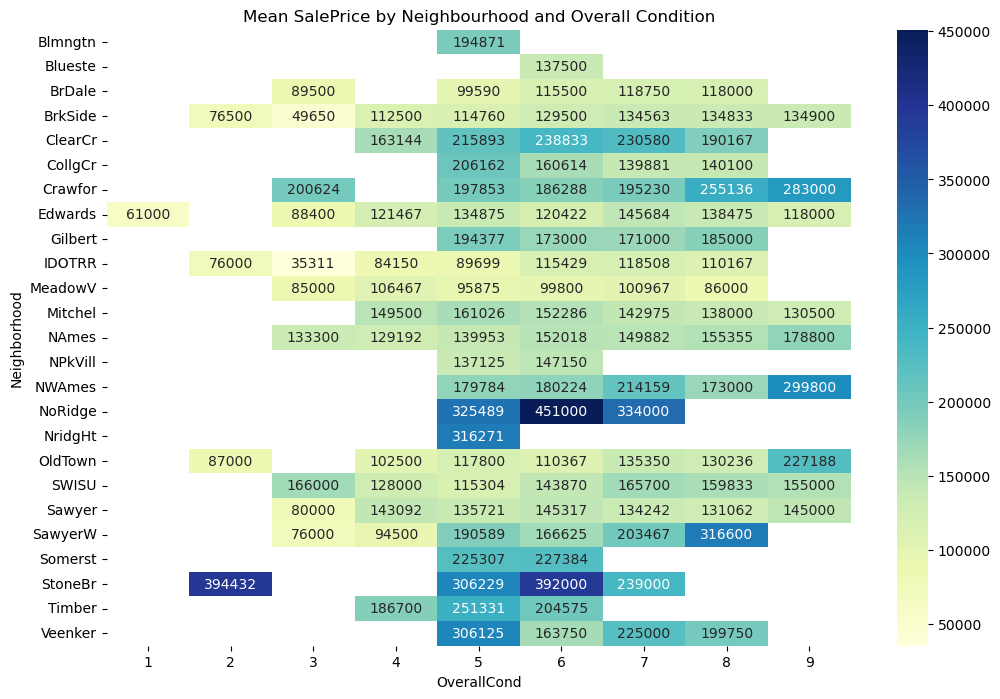

In [21]:
Overall_condition = train.groupby(['Neighborhood', 'OverallCond'])['SalePrice'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(Overall_condition, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Mean SalePrice by Neighbourhood and Overall Condition")

plt.show()

OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

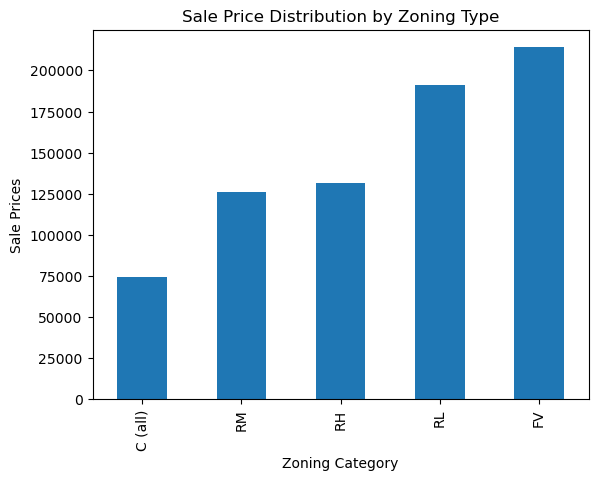

In [22]:
Neighbourhood_prices = train.groupby('MSZoning')['SalePrice'].mean().sort_values()
Neighbourhood_prices.plot(kind="bar")
plt.title("Sale Price Distribution by Zoning Type")
plt.xlabel("Zoning Category")
plt.ylabel("Sale Prices")
plt.show()

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

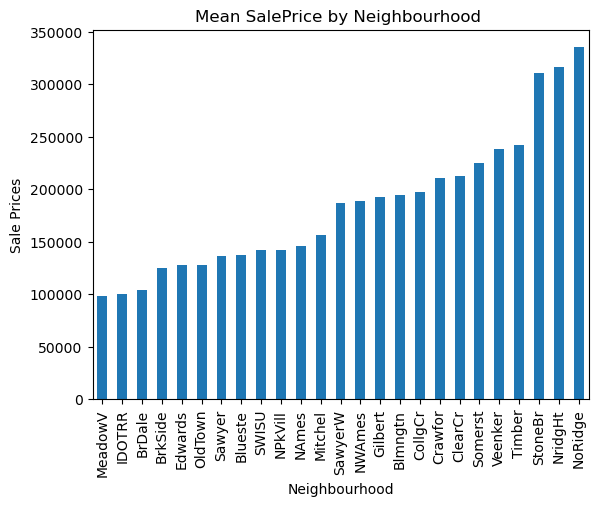

In [23]:
Neighbourhood_prices = train.groupby('Neighborhood')['SalePrice'].mean().sort_values()
Neighbourhood_prices.plot(kind="bar")
plt.title("Mean SalePrice by Neighbourhood ")
plt.xlabel("Neighbourhood")
plt.ylabel("Sale Prices")
plt.show()

From the bar chat above, NoRidge has the highest Sale Price compared to other neighbourhood

### Encoding Categorical Variables into Numerical Variables and Visualizing Correlational Features

In [24]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [25]:
train_copy = train.copy()
train_copy.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


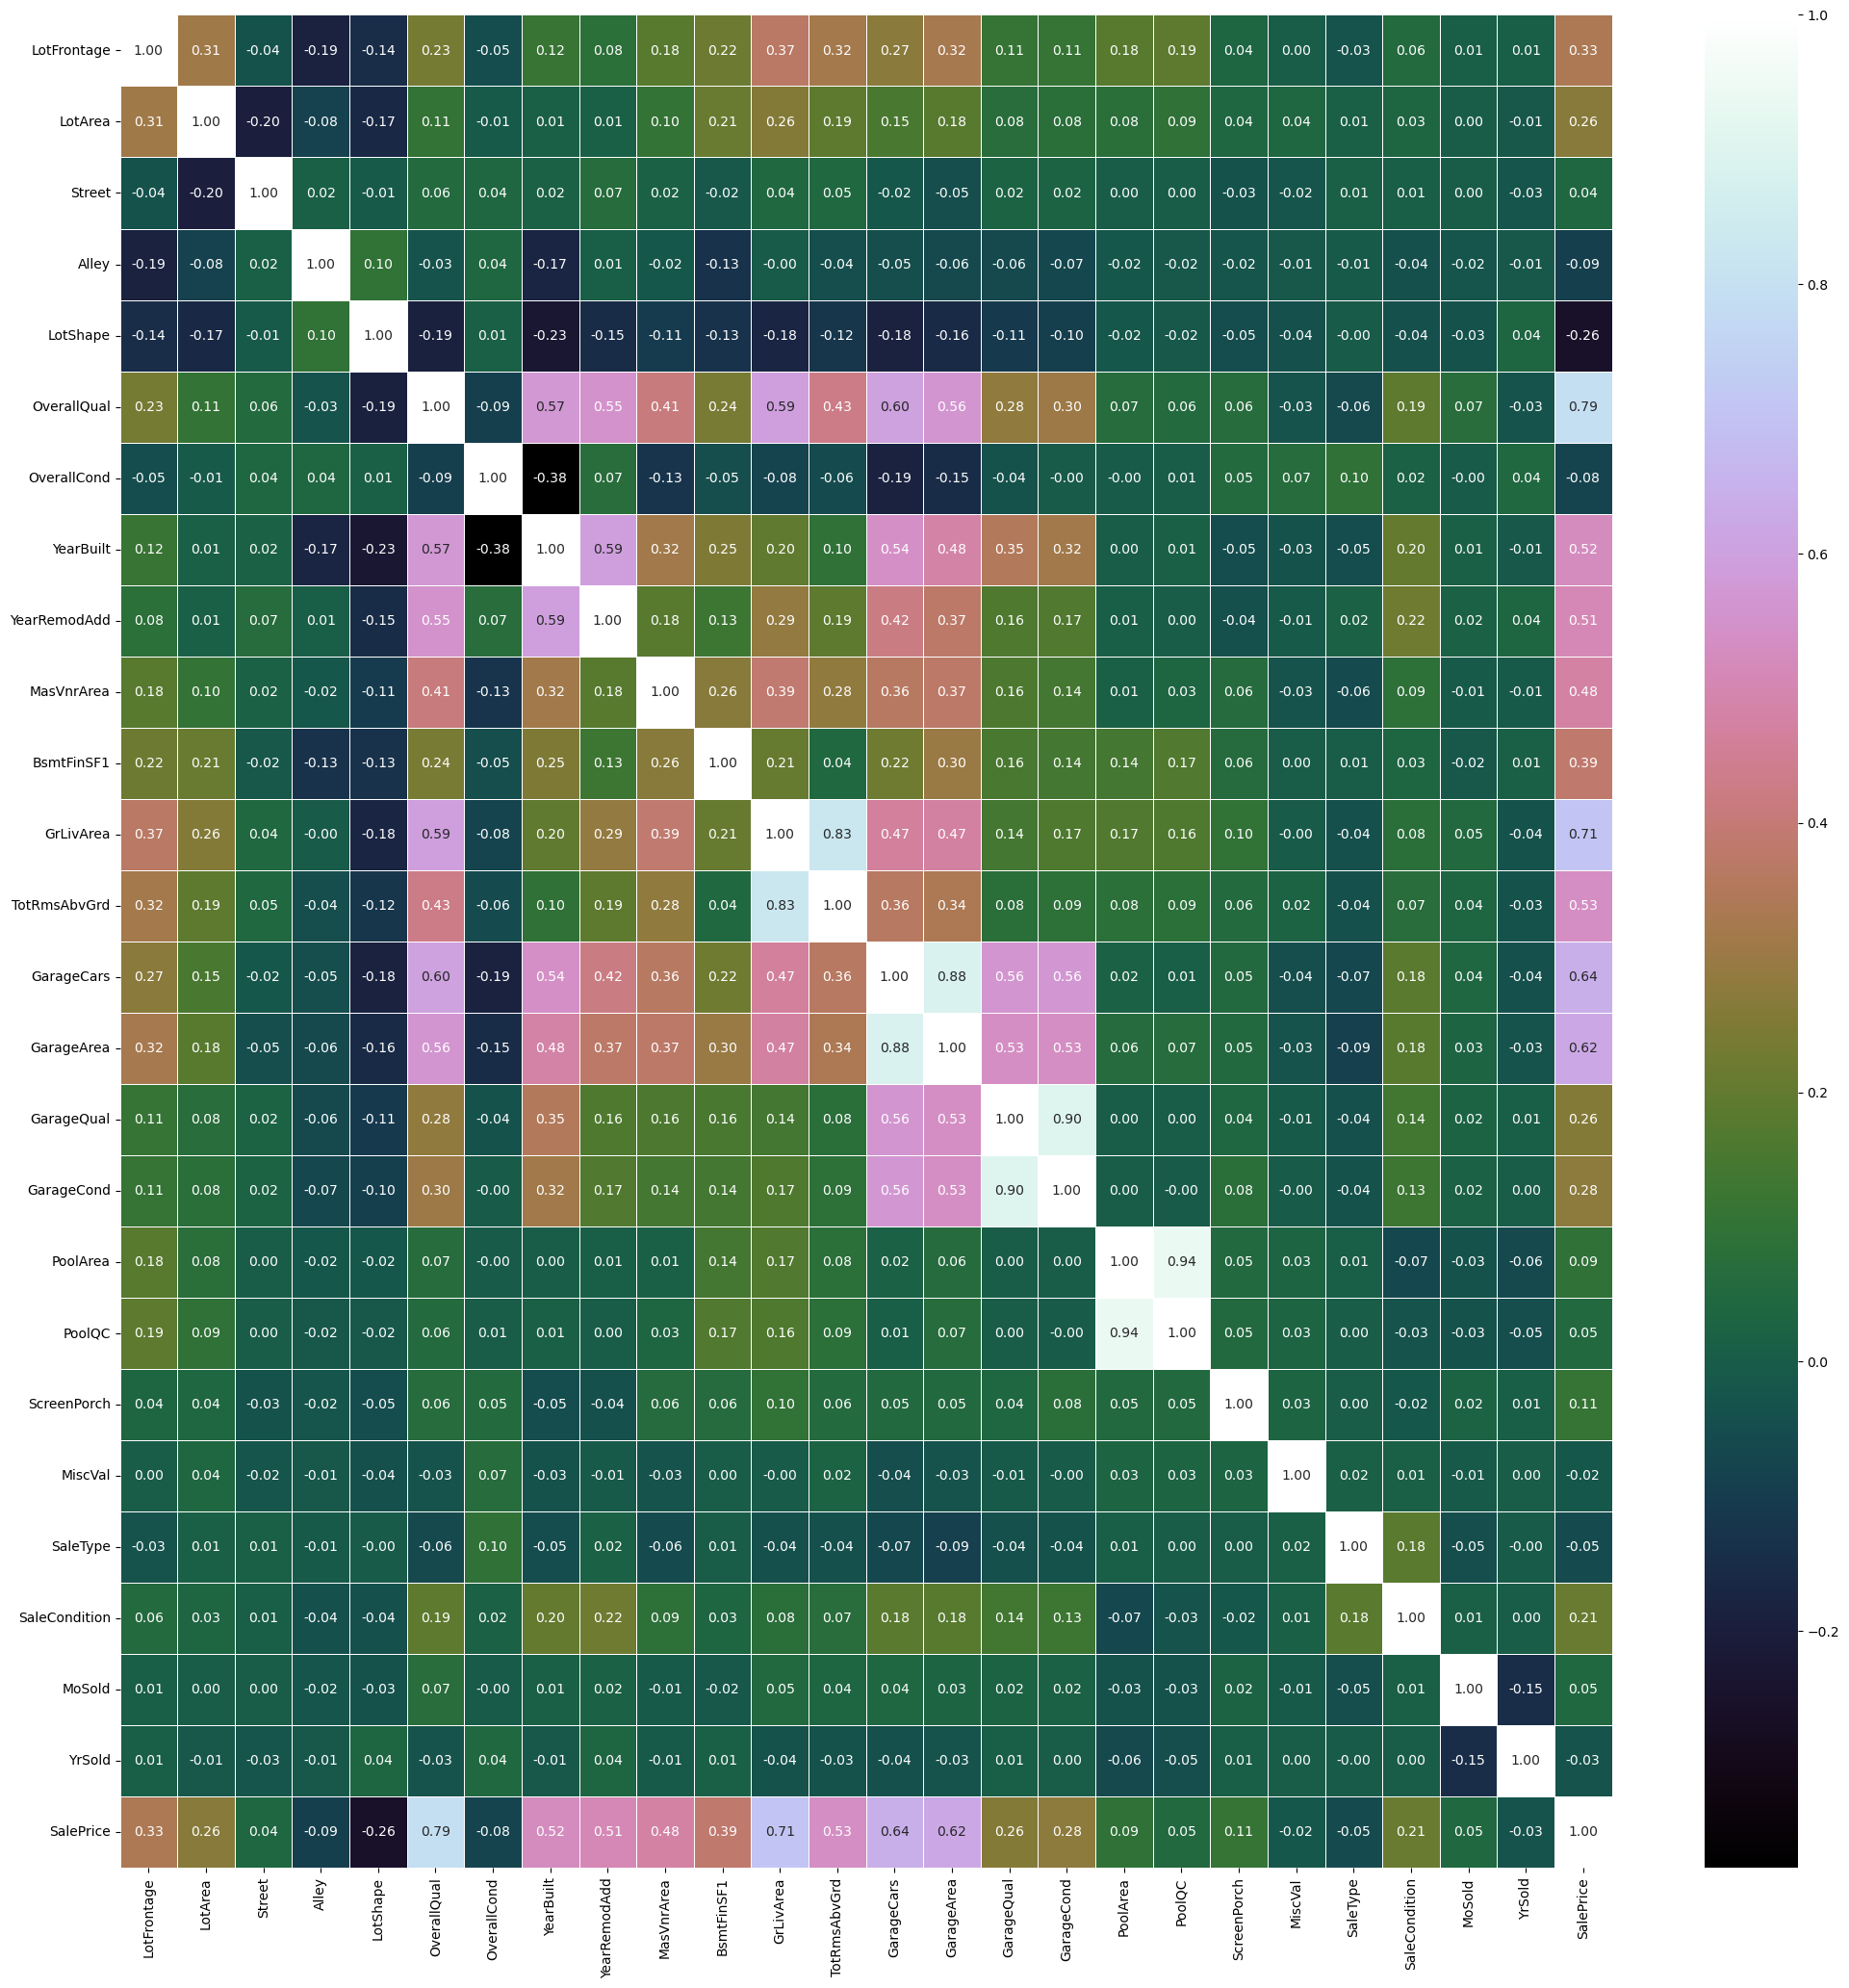

In [26]:
for label, content in train.items():
    if not pd.api.types.is_numeric_dtype(content):
        train[label] = pd.Categorical(content).codes + 1

columns = [
     'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'OverallQual', 'OverallCond', 
    'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 
    'GrLivArea', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 
    'GarageQual', 'GarageCond','PoolArea', 'PoolQC', 'ScreenPorch', 
    'MiscVal', 'SaleType', 'SaleCondition', 'MoSold', 
    'YrSold', 'SalePrice'
]
corr_matrix = train[columns].corr()
fig, ax = plt.subplots(figsize=(25, 25))
ax = sns.heatmap(corr_matrix, 
                 annot=True, 
                 linewidth=0.5,
                 fmt=".2f",
                 cmap="cubehelix")
plt.show()

In [27]:
print(train[['YearBuilt', 'YrSold']])

      YearBuilt  YrSold
0          2003    2008
1          1976    2007
2          2001    2008
3          1915    2006
4          2000    2008
...         ...     ...
1455       1999    2007
1456       1978    2010
1457       1941    2010
1458       1950    2010
1459       1965    2008

[1460 rows x 2 columns]


## Feature Engineering

We are adding new features from existing features that will be essential in modelling and experimentation

In [28]:
train_copy.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [29]:
def features(df):
    df['Overall_score'] = (df['OverallQual'] + df['OverallCond']) / 2
    df['Remod_age'] = df['YrSold'] - df['YearRemodAdd']
    df['Tot_bathrooms'] = df['FullBath'] + 0.5 * df['HalfBath']
    df['Tot_bedrooms'] = df['BedroomAbvGr']
    df['Tot_rooms'] = df['TotRmsAbvGrd']
    return df

In [30]:
train_copy  = features(train_copy)

In [31]:
train_copy

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Overall_score,Remod_age,Tot_bathrooms,Tot_bedrooms,Tot_rooms
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,2,2008,WD,Normal,208500,6.0,5,2.5,3,8
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,5,2007,WD,Normal,181500,7.0,31,2.0,3,6
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,9,2008,WD,Normal,223500,6.0,6,2.5,3,6
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,2,2006,WD,Abnorml,140000,6.0,36,1.0,3,7
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,12,2008,WD,Normal,250000,6.5,8,2.5,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,8,2007,WD,Normal,175000,5.5,7,2.5,3,7
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,2,2010,WD,Normal,210000,6.0,22,2.0,3,7
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,5,2010,WD,Normal,266500,8.0,4,2.0,4,9
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,4,2010,WD,Normal,142125,5.5,14,1.0,2,5


## 5. Modelling

In [32]:
X = train_copy[['Neighborhood', 'HouseStyle', 'Overall_score', 'Remod_age', 'Tot_bathrooms', 'Tot_bedrooms', 'Tot_rooms']]
y = train_copy['SalePrice']

In [33]:
# Encoding Object variables into Numerical categories using pandas dummies
X = pd.get_dummies(X, columns=['Neighborhood', 'HouseStyle'], dtype = int, drop_first=True)

In [34]:
X

,Overall_score,Remod_age,Tot_bathrooms,Tot_bedrooms,Tot_rooms,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,6.0,5,2.5,3,8,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,7.0,31,2.0,3,6,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,6.0,6,2.5,3,6,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,6.0,36,1.0,3,7,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,6.5,8,2.5,4,9,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5.5,7,2.5,3,7,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1456,6.0,22,2.0,3,7,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1457,8.0,4,2.0,4,9,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1458,5.5,14,1.0,2,5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [35]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [36]:
X.isnull().sum()

Overall_score           0
Remod_age               0
Tot_bathrooms           0
Tot_bedrooms            0
Tot_rooms               0
Neighborhood_Blueste    0
Neighborhood_BrDale     0
Neighborhood_BrkSide    0
Neighborhood_ClearCr    0
Neighborhood_CollgCr    0
Neighborhood_Crawfor    0
Neighborhood_Edwards    0
Neighborhood_Gilbert    0
Neighborhood_IDOTRR     0
Neighborhood_MeadowV    0
Neighborhood_Mitchel    0
Neighborhood_NAmes      0
Neighborhood_NPkVill    0
Neighborhood_NWAmes     0
Neighborhood_NoRidge    0
Neighborhood_NridgHt    0
Neighborhood_OldTown    0
Neighborhood_SWISU      0
Neighborhood_Sawyer     0
Neighborhood_SawyerW    0
Neighborhood_Somerst    0
Neighborhood_StoneBr    0
Neighborhood_Timber     0
Neighborhood_Veenker    0
HouseStyle_1.5Unf       0
HouseStyle_1Story       0
HouseStyle_2.5Fin       0
HouseStyle_2.5Unf       0
HouseStyle_2Story       0
HouseStyle_SFoyer       0
HouseStyle_SLvl         0
dtype: int64

In [37]:
y.isnull().sum()

0

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Overall_score         1460 non-null   float64
 1   Remod_age             1460 non-null   int64  
 2   Tot_bathrooms         1460 non-null   float64
 3   Tot_bedrooms          1460 non-null   int64  
 4   Tot_rooms             1460 non-null   int64  
 5   Neighborhood_Blueste  1460 non-null   int64  
 6   Neighborhood_BrDale   1460 non-null   int64  
 7   Neighborhood_BrkSide  1460 non-null   int64  
 8   Neighborhood_ClearCr  1460 non-null   int64  
 9   Neighborhood_CollgCr  1460 non-null   int64  
 10  Neighborhood_Crawfor  1460 non-null   int64  
 11  Neighborhood_Edwards  1460 non-null   int64  
 12  Neighborhood_Gilbert  1460 non-null   int64  
 13  Neighborhood_IDOTRR   1460 non-null   int64  
 14  Neighborhood_MeadowV  1460 non-null   int64  
 15  Neighborhood_Mitchel 

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
models = {"RandomForest":RandomForestRegressor(random_state=42),
          "DecisionTree":DecisionTreeRegressor(random_state=42),
          "LinearRegression":LinearRegression()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test: test labels
    """
    model_scores = {}

    for name,  model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [41]:
model_scores = fit_and_score(models = models,
                             X_train = X_train, 
                             X_test = X_test, 
                             y_train = y_train, 
                             y_test = y_test)

In [42]:
model_scores

{'RandomForest': 0.8395733609126635,
 'DecisionTree': 0.700548555660528,
 'LinearRegression': 0.7683927759827764}

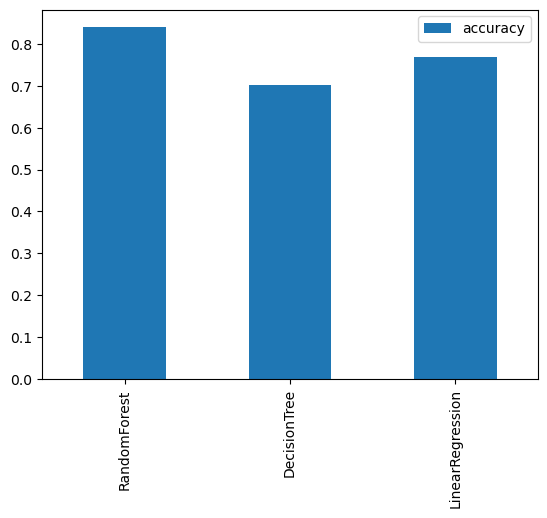

In [43]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()
plt.show()

Random Forest model has performed the best at base level.

###  Evaluation

In [44]:
model_preds = {}
print("\nModel Performance Metrics:")
for name, model in models.items():
    y_preds = model.predict(X_test)
    model_preds[name] = y_preds

     # Calculate metrics
    mse = mean_squared_error(y_test, y_preds)
    rmse = root_mean_squared_error(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)
    r2 = r2_score(y_test, y_preds)

    print(f"\n{name} Model:")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R² Score: {r2:.3f}")


Model Performance Metrics:

RandomForest Model:
MSE: 1230524654.12
RMSE: 35078.83
MAE: 23961.87
R² Score: 0.840

DecisionTree Model:
MSE: 2296890261.30
RMSE: 47925.88
MAE: 31598.42
R² Score: 0.701

LinearRegression Model:
MSE: 1776502960.15
RMSE: 42148.58
MAE: 27533.21
R² Score: 0.768


According to the metrics above, Random Forest model has perfomed better at base level. 

In [45]:
# Cross Validation scores across 5 folds
Rf_model = models["RandomForest"]
print(cross_val_score(Rf_model, X, y, cv=5))
Rf_model.score(X_test, y_test), np.mean(cross_val_score(Rf_model, X, y, cv=5, scoring="r2"))

[0.73242328 0.75578299 0.80272579 0.79682099 0.77785045]


(0.8395733609126635, 0.7731207007653618)

## Hyperparameter Tuning with RandomizedSearchCV

In [46]:
Rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [47]:
param_grid = {"n_estimators":[50, 100, 500, 1000],
              "max_depth":[None ,10, 20, 30],
              "min_samples_split":[2, 5, 10],
              "min_samples_leaf":[1, 2, 4]}

randomized_search = RandomizedSearchCV(estimator=Rf_model, 
                                       param_distributions=param_grid, 
                                       n_iter=100, 
                                       cv=5, 
                                       random_state=42)

randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 500, 1000]},
                   random_state=42)

In [48]:
randomized_search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': None}

In [49]:
print(randomized_search.best_estimator_)

RandomForestRegressor(n_estimators=1000, random_state=42)


In [50]:
best_model= randomized_search.best_estimator_

In [51]:
best_model.score(X_test, y_test)

0.8385918844409144

In [52]:
# Calculate metrics
def evaluation_func(model, X_test, y_test, name):
    y_preds = model.predict(X_test)

    mse = mean_squared_error(y_test, y_preds)
    rmse = root_mean_squared_error(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)
    r2 = r2_score(y_test, y_preds)

    print(f"\n{name} Model:")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R² Score: {r2:.3f}")

In [53]:
evaluation_func(best_model, X_test, y_test, name="Random Forest")


Random Forest Model:
MSE: 1238052898.83
RMSE: 35185.98
MAE: 23919.96
R² Score: 0.839


In [54]:
test = pd.read_csv("Data/test.csv")

In [55]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [56]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [57]:
test.duplicated().sum()

0

In [58]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [59]:
test_Ids = test['Id'].copy()

In [60]:
def features(df):
    df['Overall_score'] = (df['OverallQual'] + df['OverallCond']) / 2
    df['Remod_age'] = df['YrSold'] - df['YearRemodAdd']
    df['Tot_bathrooms'] = df['FullBath'] + 0.5 * df['HalfBath']
    df['Tot_bedrooms'] = df['BedroomAbvGr']
    df['Tot_rooms'] = df['TotRmsAbvGrd']
    return df

In [61]:
test = features(test)

In [62]:
test = test[['Neighborhood', 'HouseStyle', 'Overall_score', 'Remod_age', 'Tot_bathrooms', 'Tot_bedrooms', 'Tot_rooms']]

In [63]:
print(test.columns)

Index(['Neighborhood', 'HouseStyle', 'Overall_score', 'Remod_age',
       'Tot_bathrooms', 'Tot_bedrooms', 'Tot_rooms'],
      dtype='object')


In [64]:
# Encoding Object variables into Numerical categories using pandas dummies
final_test = pd.get_dummies(test, dtype = int, drop_first=True)
final_test_aligned = final_test.reindex(columns=X.columns, fill_value=0)

In [65]:
final_test_aligned

,Overall_score,Remod_age,Tot_bathrooms,Tot_bedrooms,Tot_rooms,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,5.5,49,1.0,2,5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,6.0,52,1.5,3,6,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,5.0,12,2.5,3,6,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,6.0,12,2.5,3,7,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,6.5,18,2.0,2,5,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.5,36,1.5,3,5,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1455,4.5,36,1.5,3,6,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1456,6.0,10,1.0,4,7,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1457,5.0,14,1.0,3,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [66]:
# Predicting the final test 
test_preds = best_model.predict(final_test_aligned)
test_preds

array([126604.875     , 152681.90733333, 161664.44566667, ...,
       145221.96466667, 148859.47533333, 231050.36666667])

In [67]:
df_preds = pd.DataFrame()
df_preds['Id'] = test_Ids
df_preds['SalePrice'] = test_preds

In [68]:
df_preds

,Id,SalePrice
0,1461,126604.875000
1,1462,152681.907333
2,1463,161664.445667
3,1464,192720.550714
4,1465,209229.470000
...,...,...
1454,2915,110376.974000
1455,2916,98426.117000
1456,2917,145221.964667
1457,2918,148859.475333


In [69]:
# Saving final submission prices in a csv per Kaggle rule
df_preds.to_csv("Data/submission.csv")

### Feature Importance

Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the **target variable** (SalePrice)

In [70]:
best_model.feature_importances_

array([3.10256136e-01, 1.06512845e-01, 2.72159210e-01, 3.87730703e-02,
       8.54275600e-02, 1.65058448e-05, 2.40747700e-03, 2.60360585e-03,
       8.64645443e-03, 5.45562389e-03, 7.38264550e-03, 7.59696197e-03,
       2.77205723e-03, 2.28057520e-03, 9.44187511e-04, 1.58130201e-03,
       4.10753529e-03, 2.51462460e-04, 4.47691974e-03, 3.13911506e-02,
       3.24339204e-02, 9.35760331e-03, 2.04144243e-03, 2.93631192e-03,
       1.63315341e-03, 5.74166800e-03, 1.48420632e-02, 6.53522013e-03,
       7.59657983e-03, 1.78695966e-04, 9.10562668e-03, 5.57349266e-04,
       3.69142406e-04, 8.71647338e-03, 3.11229048e-04, 2.60023441e-03])

In [71]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))

    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

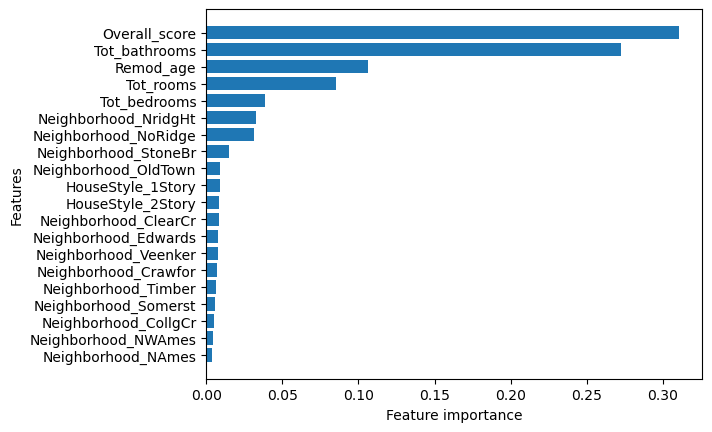

In [72]:
plot_features(X_train.columns, best_model.feature_importances_)
plt.show()

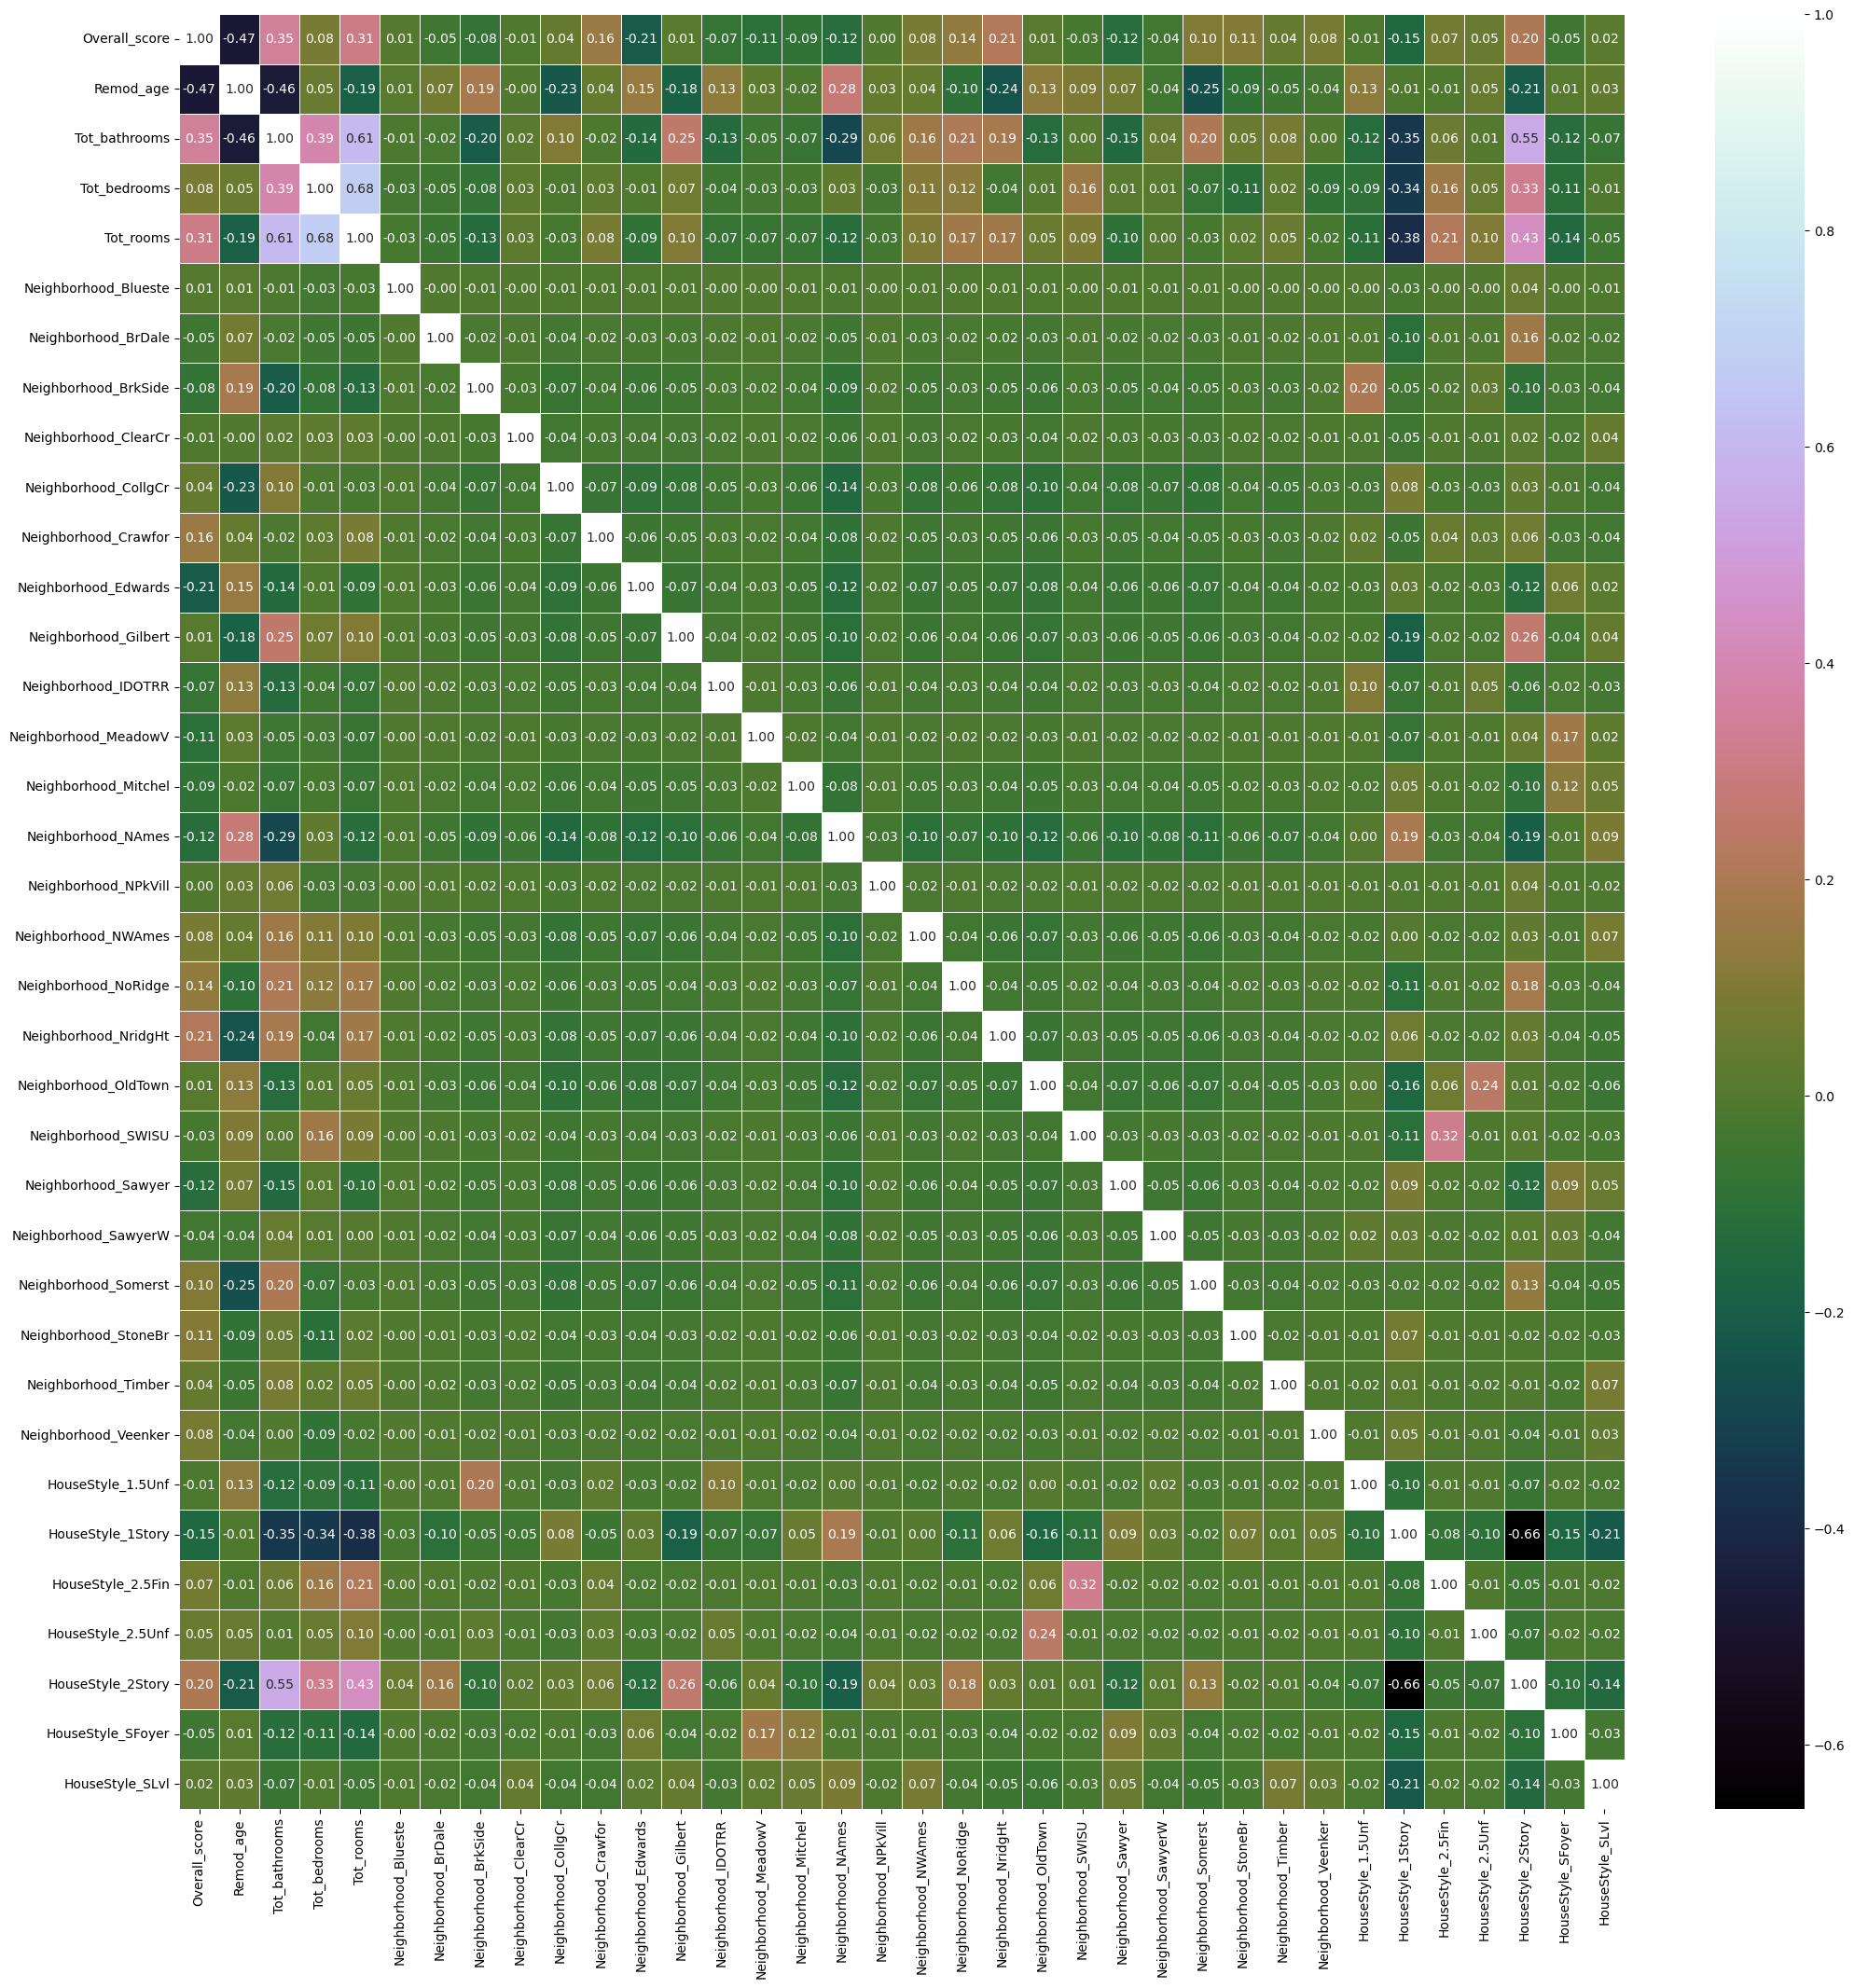

In [73]:
corr_matrix = X_train.corr()
fig, ax = plt.subplots(figsize=(25, 25))
ax = sns.heatmap(corr_matrix, 
                 annot=True, 
                 linewidth=0.5,
                 fmt=".2f",
                 cmap="cubehelix")
plt.show()

## 6. Experimentation

The Random Forest Hypertuned model will be used in a live system through:



### Saving the Model



In [74]:
from joblib import dump, load
dump(best_model, filename="Models/random_forest.joblib")

['Models/random_forest.joblib']

In [76]:
dump(list(X_train.columns), "Models/model_columns.pkl")

['Models/model_columns.pkl']